# IMPORTING THE PYTHON LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols                               
pd.set_option('display.max_column' , None)
#plt.rcParams['figure.figsize'] = (9,5)
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import chi2_contingency

# IMPORTING DATASET

In [2]:
df = pd.read_csv("HR Employee Attrition.csv")
df = pd.DataFrame(df)

## BASIC CHECKS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

     •Here information tells us that there is no null values are present in data, so we need not to handle null values.
     •However it can be seen that there are 9 features or columns which are of object" data type, so we have to handle           catagorical columns for our model creation

### Check for duplicated data

In [4]:
df.duplicated().sum()

0

•There is no duplicate

In [5]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


•The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


      • Here two columns(Employ_count,Standard Hours) have std=0 so it means they have unique values it means they are not able to use in analysis.

In [7]:
df.describe(include = 'O').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


       • HERE IN OVER 18 COLUMN WE ONLY HAVE 1 UNIQUE VALUE SO IT MEANS NO ANALYSIS DONE ON IT

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

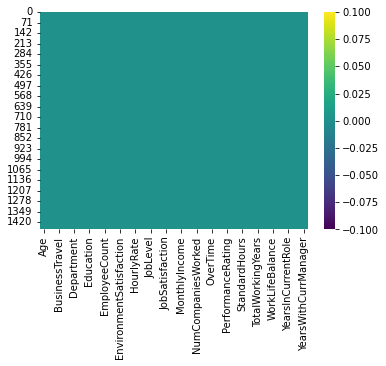

In [9]:
sns.heatmap(df.isnull() , cmap = 'viridis')

•From above graph, we can see that there are no missing values in our dataset.

In [10]:
df.shape

(1470, 35)

   •There are 1470 Rows & 35 Columns in our Dataset

# EDA (EXPLORATORY DATA ANALSIS )

## Attrition

• ATTRITION--> Attrition is the departure of employees from the organization for any reason or in simple words we can say that employees who want to

leave the company.

.ATTRITION YES"> Employee wants to leave the company.

.ATTRITION "NO" Employee don't want to leave.


In [11]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

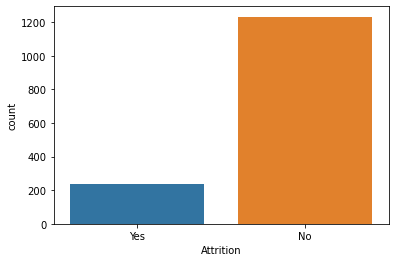

In [12]:
sns.countplot(df.Attrition)

    • Data of Attrition says that it has more number of "No" values and less number of "Yes".  
    • It can be seen that there is big difference in counts of the values so we can say that it is IMBALANCE DATA

## Age           ~Age of an Employee

In [13]:
df.Age.value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

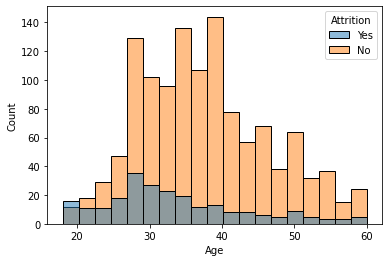

In [14]:
sns.histplot(x = 'Age' , hue = 'Attrition' , data = df)

   • Employees in age of 25 to 35 are more likely to leave the job
   
   • After 40 age,the distribution tells us that "Higher the age Lesser will be attrition"

<AxesSubplot:xlabel='Age'>

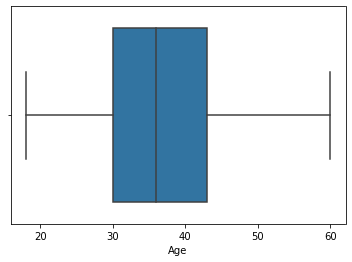

In [15]:
sns.boxplot(df.Age)

In [16]:
import statsmodels.api as sm
annova = ols('Age ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df        sum_sq     mean_sq         F  PR(>F)
Attrition     1.0    3107.33341  3107.33341  38.17589     0.0
Residual   1468.0  119488.13326    81.39519       NaN     NaN


## Business Travel  ~ That Employee is traveling or not for business purpose

In [17]:
df.BusinessTravel.value_counts()              

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

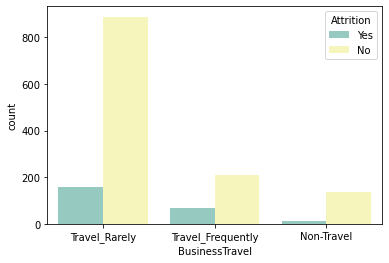

In [18]:
sns.countplot(x = 'BusinessTravel' , hue = 'Attrition' , data = df , palette = 'Set3')

• Graph tells us that company has more count or more no. of employes who travels rarely. It means travel rate of company is less.

• There are more employes which travels rarely and are not satisfied with their job

• Non-traveller have least count as well as least attrition.

In [19]:
#Mapping
df.BusinessTravel = df.BusinessTravel.map({'Non-Travel':0 , 'Travel_Rarely':1 , 'Travel_Frequently':2})

In [20]:
#Chi-Square
chi2_contingency(pd.crosstab(df.Attrition , df.BusinessTravel))[1]#good predictor

5.608614476449942e-06

## Daily Rate~ Rating given to employee on daily basis

In [21]:
df.DailyRate.value_counts()

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

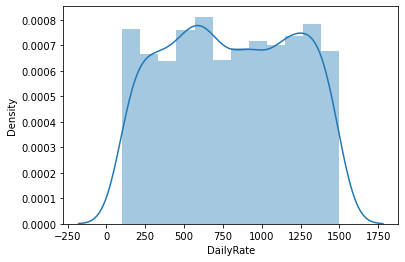

In [22]:
sns.distplot(df.DailyRate)

<AxesSubplot:xlabel='DailyRate'>

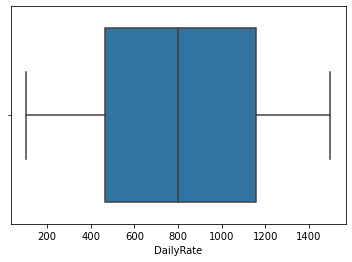

In [23]:
sns.boxplot(df.DailyRate)

In [24]:
#Annova
annova = ols('DailyRate ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))#good predictor

               df        sum_sq       mean_sq        F   PR(>F)
Attrition     1.0  7.676422e+05  767642.18128  4.72664  0.02986
Residual   1468.0  2.384143e+08  162407.58925      NaN      NaN


## Department ~ In which Department of company Employee is working

In [25]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

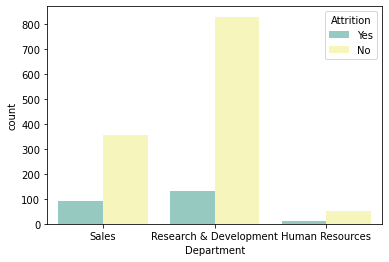

In [26]:
sns.countplot(x = 'Department' , hue = 'Attrition' , data = df , palette = 'Set3')

• There are 3 no. of department are there-> 1. Sales, 2 Research and Development, 3 HR department

• "Research and Development department have more number of Attrition(150 employees) as compared to other two department.  

• "HR Department" have least Attrition with just 5 to 10 employees

In [27]:
df.Department = df.Department.map({'Human Resources':3 , 'Sales':2 , 'Research & Development':1})

In [28]:
chi2_contingency(pd.crosstab(df.Attrition , df.Department))[1]

0.004525606574479633

## Distance From Home~ That how much distance is there of an employee from house to office

In [29]:
df.DistanceFromHome.value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

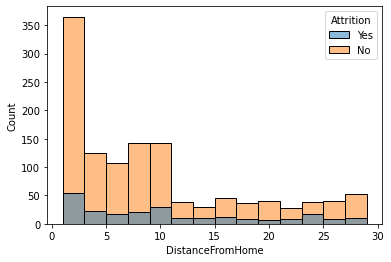

In [30]:
sns.histplot(x = df.DistanceFromHome , hue = df.Attrition)

    • Employee who has distance range of 0-10 km, are more likely to leave the job
    • we can also conclude that lesser the distance more number of employees are working

<AxesSubplot:xlabel='DistanceFromHome'>

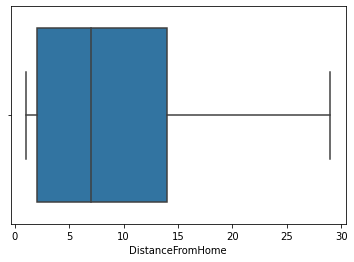

In [31]:
sns.boxplot(df.DistanceFromHome)

In [32]:
annova = ols('DistanceFromHome ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df       sum_sq    mean_sq        F   PR(>F)
Attrition     1.0    586.22650  586.22650  8.96828  0.00279
Residual   1468.0  95958.29119   65.36668      NaN      NaN


## Education

In [33]:
df.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

1 'Below College',
2 'College',
3 'Bachelor',
4 'Master',
5 'Doctor'.

<AxesSubplot:xlabel='Education', ylabel='count'>

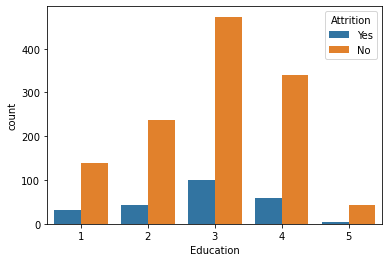

In [34]:
sns.countplot(x = df.Education , hue = df.Attrition)

In [35]:
annova = ols('Education ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df      sum_sq  mean_sq        F   PR(>F)
Attrition     1.0     1.51659  1.51659  1.44631  0.22932
Residual   1468.0  1539.33783  1.04860      NaN      NaN


In [36]:
df.drop(['Education'],axis = 1 , inplace = True)

## Education Field~ From which education background Employee belongs to

In [37]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

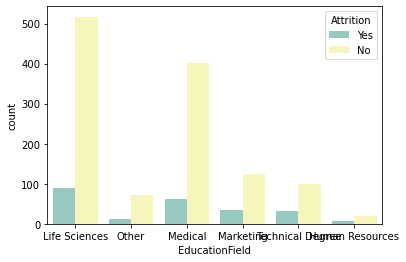

In [38]:
sns.countplot(x = 'EducationField' , hue = 'Attrition' , data = df , palette = 'Set3')

• First and foremost thing is that Employees who are from Life Science" and "Medical" backgrounds are more as compared to other edication fields.

• Nearly 100 number of employees are there who are from Life Science education background will leave the company and followed by Medical education Employees 

• As we conclude from analysis of Department and Attrition, here also HR educational background employees have least Attrition.

In [39]:
df.EducationField = df.EducationField.map({'Medical':2 , 'Life Sciences':1 , 'Marketing':3 , 'Technical Degree':4 , 'Other':5})

In [40]:
df.EducationField.fillna(df.EducationField.median() , inplace = True)

In [41]:
chi2_contingency(pd.crosstab(df.Attrition , df.EducationField))[1]

0.010576348822591126

## Employee Count

In [42]:
df.EmployeeCount.value_counts()     

1    1470
Name: EmployeeCount, dtype: int64

In [43]:
df.drop(['EmployeeCount'] , axis = 1 , inplace = True)

## Employee Number

In [44]:
df.EmployeeNumber.value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [45]:
df.drop(['EmployeeNumber'] , axis = 1 , inplace = True)

## Environment Satisfaction~It is that employee satisfied with their environmentof office (rate)

In [46]:
df.EnvironmentSatisfaction.value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

1 'Low',
2 'Medium',
3 'High',
4 'Very High'.

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

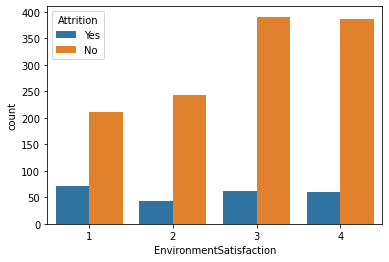

In [47]:
sns.countplot(x = df.EnvironmentSatisfaction , hue = df.Attrition)

    • Increase in rate of Environment satisfaction gives rise to increase in Attrition'No'

In [48]:
annova = ols('EnvironmentSatisfaction ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df     sum_sq   mean_sq         F   PR(>F)
Attrition     1.0    18.7546  18.75460  15.85521  0.00007
Residual   1468.0  1736.4488   1.18287       NaN      NaN


## Gender

In [49]:
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

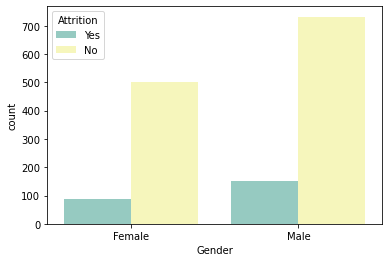

In [50]:
sns.countplot(x = 'Gender' , hue = 'Attrition' , data = df , palette = 'Set3')

    • Male employees are more as compared to Females.
    • Males are more likely to quit the job rather than Females.

In [51]:
#Mapping
df.Gender = df.Gender.map({'Male':2 , 'Female':1})

In [52]:
chi2_contingency(pd.crosstab(df.Attrition , df.Gender))[1]

0.29057244902890855

In [53]:
df.drop(['Gender'] , axis = 1 , inplace = True)

## Hourly Rate~Rating given to employee on hourly basis

In [54]:
df.HourlyRate.value_counts()

66    29
98    28
42    28
48    28
84    28
      ..
31    15
53    14
68    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

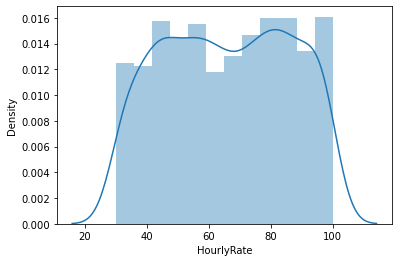

In [55]:
sns.distplot(df.HourlyRate)

<AxesSubplot:xlabel='HourlyRate'>

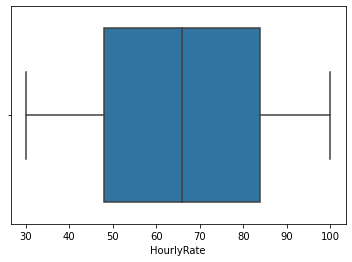

In [56]:
sns.boxplot(df.HourlyRate)

In [57]:
annova = ols('HourlyRate ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df        sum_sq    mean_sq       F   PR(>F)
Attrition     1.0      28.45042   28.45042  0.0688  0.79313
Residual   1468.0  607088.13461  413.54778     NaN      NaN


In [58]:
df.drop(['HourlyRate'] , axis = 1 , inplace = True)

## Job Involvement~How much employee is involved in his work(rate)

In [59]:
df.JobInvolvement.value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

1 'Low',
2 'Medium',
3 'High',
4 'Very High'.

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

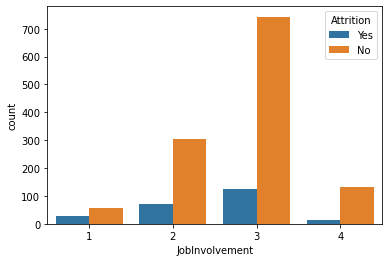

In [60]:
sns.countplot(x = df.JobInvolvement , hue = df.Attrition)

 • The employees who involved in job more than sufficient are more likely to quit or we can say that they have more pressure of work

 • Somehow, there are some emp. who are not involved fully in there job but still they are likely to quit.

In [61]:
annova = ols('JobInvolvement ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df     sum_sq   mean_sq         F  PR(>F)
Attrition     1.0   12.57302  12.57302  25.24199     0.0
Residual   1468.0  731.20997   0.49810       NaN     NaN


## Job Level~Level of job

In [62]:
df.JobLevel.value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

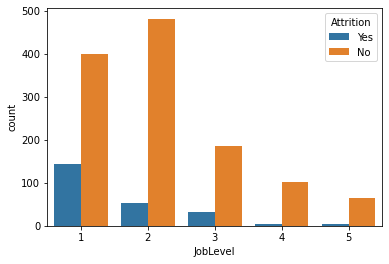

In [63]:
sns.countplot(x = df.JobLevel , hue = df.Attrition)

    • Increase in job level,decrease in chances to leaving the company for employees

In [64]:
annova = ols('JobLevel ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df      sum_sq   mean_sq         F  PR(>F)
Attrition     1.0    51.47324  51.47324  43.21534     0.0
Residual   1468.0  1748.51588   1.19109       NaN     NaN


## Job Role

In [65]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='JobRole', ylabel='count'>

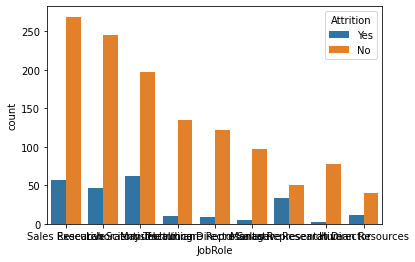

In [66]:
sns.countplot(x = 'JobRole' , hue = 'Attrition' , data = df )

 • There are less no of Research Director who leaves the company

 • Laboratory Technician. Sales Executive and Research Scientist are the top 3 job roles in which emloyees have thier Attrition "Yes"

 • Apart from these it can also seen that there are more number of employees in Sales Executive job role

In [67]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
lr1 = LabelEncoder()
df['JobRole'] = lr1.fit_transform(df['JobRole'])

In [68]:
chi2_contingency(pd.crosstab(df.Attrition , df.JobRole))[1]

2.752481638050657e-15

## Job Satisfaction~It is that employee satisfied with their job (rate)

In [69]:
df.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

1 'Low',
2 'Medium',
3 'High',
4 'Very High'.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

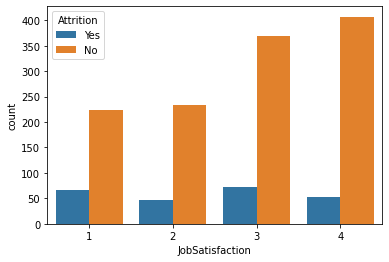

In [70]:
sns.countplot(x = df.JobSatisfaction , hue = df.Attrition)

    • Increase in rate of job satisfaction gives rise to increase in Attrition'No'

In [71]:
annova = ols(' JobSatisfaction~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df     sum_sq   mean_sq      F   PR(>F)
Attrition     1.0    19.1326  19.13260  15.89  0.00007
Residual   1468.0  1767.5674   1.20406    NaN      NaN


## Marital Status

In [72]:
df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

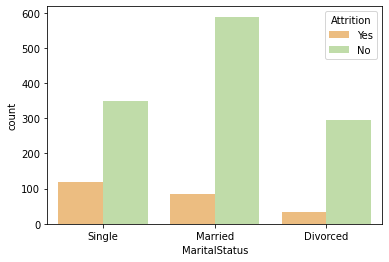

In [73]:
sns.countplot(x = 'MaritalStatus' , hue = 'Attrition' , data = df , palette = 'Spectral')

In [74]:
df.MaritalStatus = df.MaritalStatus.map({'Married':1 , 'Single':2 ,'Divorced':3})

In [75]:
chi2_contingency(pd.crosstab(df.Attrition , df.MaritalStatus))[1]

9.45551106034083e-11

## Monthly Income~ Monthly Salary of an employee

In [76]:
df.MonthlyIncome.value_counts()

2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: MonthlyIncome, Length: 1349, dtype: int64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

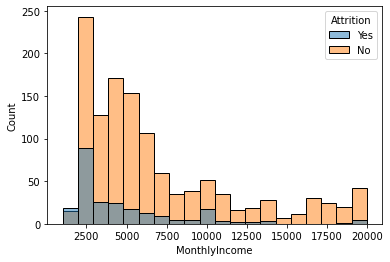

In [77]:
sns.histplot(x = df.MonthlyIncome , hue = df.Attrition)

    • Higher the monthly income give rise to less Attrition
    • Employees who have their income aprox.2.5k are more likely to quite their job, because 2.5k is the least range of                 income

<AxesSubplot:xlabel='MonthlyIncome'>

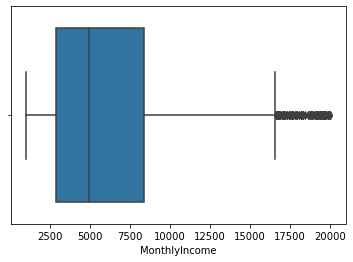

In [78]:
sns.boxplot(df.MonthlyIncome)

In [79]:
q1 = df.MonthlyIncome.quantile(0.25)
q3 = df.MonthlyIncome.quantile(0.75)
iqr = q3 - q1
u_b_MonthlyIncome = q3 + (1.5*iqr)
l_b_MonthlyIncome = q1 - (1.5*iqr)

In [80]:
df.MonthlyIncome = np.where(df.MonthlyIncome>u_b_MonthlyIncome,u_b_MonthlyIncome, np.where(df.MonthlyIncome <l_b_MonthlyIncome, l_b_MonthlyIncome, df.MonthlyIncome))

<AxesSubplot:xlabel='MonthlyIncome'>

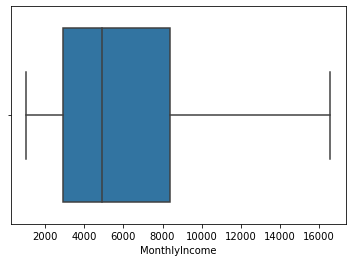

In [81]:
sns.boxplot(df.MonthlyIncome)

In [82]:
annova = ols('MonthlyIncome ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df        sum_sq       mean_sq         F  PR(>F)
Attrition     1.0  7.559031e+08  7.559031e+08  40.97123     0.0
Residual   1468.0  2.708402e+10  1.844961e+07       NaN     NaN


## Monthly Rate~Rating given to employee on monthly basis

In [83]:
df.MonthlyRate.value_counts()

4223     3
9150     3
9558     2
12858    2
22074    2
        ..
14561    1
2671     1
5718     1
11757    1
10228    1
Name: MonthlyRate, Length: 1427, dtype: int64

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

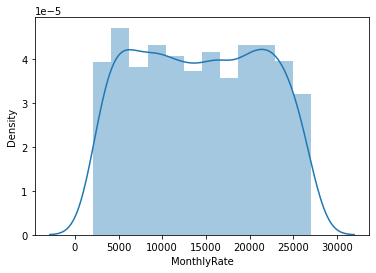

In [84]:
sns.distplot(df.MonthlyRate)

<AxesSubplot:xlabel='MonthlyRate'>

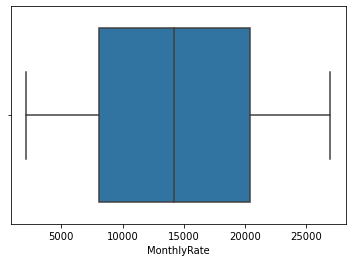

In [85]:
sns.boxplot(df.MonthlyRate)

In [86]:
annova = ols('MonthlyRate ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df        sum_sq       mean_sq        F   PR(>F)
Attrition     1.0  1.712754e+07  1.712754e+07  0.33792  0.56112
Residual   1468.0  7.440664e+10  5.068572e+07      NaN      NaN


In [87]:
df.drop(['MonthlyRate'] , axis = 1 , inplace = True)

## Num Companies Worked

In [88]:
df.NumCompaniesWorked.value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Count'>

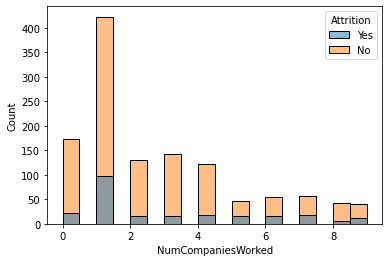

In [89]:
sns.histplot(x = df.NumCompaniesWorked , hue = df.Attrition)

      • only that employees (no. of emp.=100) who worked with 1 company before have most Attrition, rest have similiar data

In [90]:
annova = ols(' NumCompaniesWorked~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df      sum_sq   mean_sq        F   PR(>F)
Attrition     1.0    17.34057  17.34057  2.78229  0.09553
Residual   1468.0  9149.29141   6.23249      NaN      NaN


In [91]:
df.drop(['NumCompaniesWorked'] , axis = 1 , inplace = True)

## Over18

In [92]:
df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [93]:
df.drop(['Over18'] , axis = 1 , inplace = True)

## Over Time

In [94]:
df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

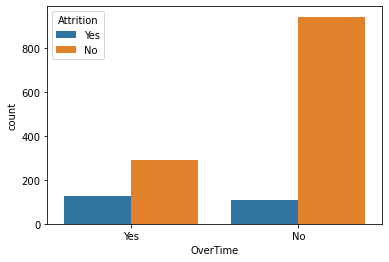

In [95]:
sns.countplot(x = 'OverTime' , hue = 'Attrition' , data = df)

  • As for "Attrition yes", there is minor difference between the Employees who are doing overtime and who are not doing overtime
  
  • So we can say that Overtime feature is not much effecting Attrition 
  
  • But we can conclude that most of employees are not doing overtime.

In [96]:
df.OverTime = df.OverTime.map({'No':2 , 'Yes':1})

In [97]:
chi2_contingency(pd.crosstab(df.Attrition,df.OverTime))[1]

8.158423721538262e-21

## Percent Salary Hike~ How much percent salary is  increasing annually

In [98]:
df.PercentSalaryHike.value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Count'>

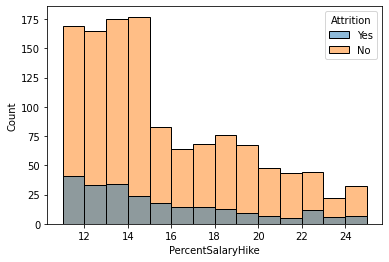

In [99]:
sns.histplot(x = df.PercentSalaryHike , hue = df.Attrition)

      • Higher the salary percentage hike, lesser the attrition

<AxesSubplot:xlabel='PercentSalaryHike'>

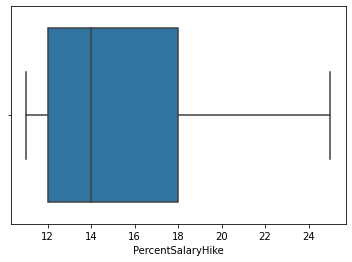

In [100]:
sns.boxplot(df.PercentSalaryHike)

In [101]:
annova = ols('PercentSalaryHike ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df       sum_sq   mean_sq        F   PR(>F)
Attrition     1.0      3.57465   3.57465  0.26673  0.60561
Residual   1468.0  19673.89202  13.40183      NaN      NaN


In [102]:
df.drop(['PercentSalaryHike'] , axis = 1 , inplace = True)

## Performance Rating~How employee is performing according to his job

In [103]:
df.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

1 'Low',
2 'Good',
3 'Excellent',
4 'Outstanding'.

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

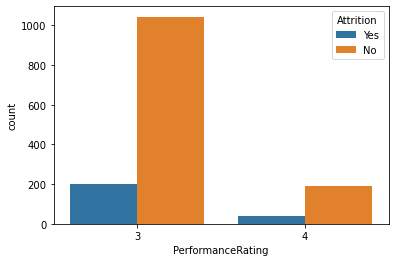

In [104]:
sns.countplot(x = 'PerformanceRating' , hue = 'Attrition' , data = df)

• On an average, most of employees are moderately performed (because performance rating lies in 3-4)

• However employes having less Performance rating are more likely to quit or we can say that company wants to fire that employees

In [105]:
chi2_contingency(pd.crosstab(df.Attrition , df.PerformanceRating))[1]

0.9900745465934576

In [106]:
df.drop(['PerformanceRating'] , axis = 1 , inplace = True)

## Relationship Satisfaction

In [107]:
df.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

1 'Low',
2 'Medium',
3 'High',
4 'Very High'.


<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

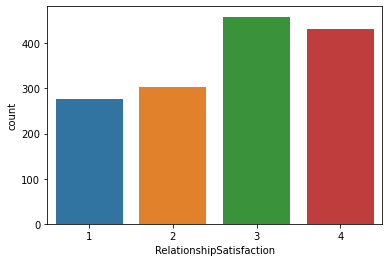

In [108]:
sns.countplot(df.RelationshipSatisfaction)

In [109]:
annova = ols('RelationshipSatisfaction ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df      sum_sq  mean_sq        F   PR(>F)
Attrition     1.0     3.61361  3.61361  3.09558  0.07871
Residual   1468.0  1713.66598  1.16735      NaN      NaN


In [110]:
df.drop(['RelationshipSatisfaction'] , axis = 1 , inplace = True)

## Standard Hours

In [111]:
df.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [112]:
df.drop(['StandardHours'] , axis=1 , inplace=True)

## Stock Option Level

In [113]:
df.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

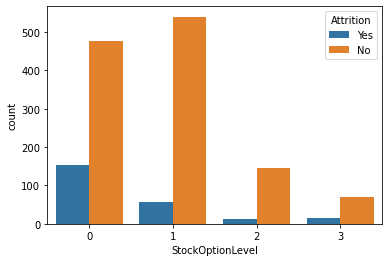

In [114]:
sns.countplot(x = df.StockOptionLevel , hue = df.Attrition)

    • For the epms. who're not having stock option are likely to quit

In [115]:
annova = ols('StockOptionLevel ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df      sum_sq   mean_sq        F  PR(>F)
Attrition     1.0    20.06035  20.06035  28.1405     0.0
Residual   1468.0  1046.48454   0.71286      NaN     NaN


## Total Working Years

In [116]:
df.TotalWorkingYears.value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

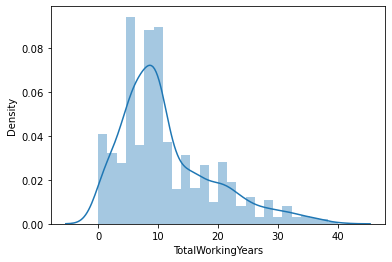

In [117]:
sns.distplot(df.TotalWorkingYears)

<AxesSubplot:xlabel='TotalWorkingYears'>

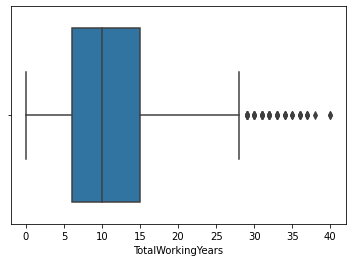

In [118]:
sns.boxplot(df.TotalWorkingYears)

In [119]:
q1 = df.TotalWorkingYears.quantile(0.25)
q3 = df.TotalWorkingYears.quantile(0.75)
iqr = q3 - q1
u_b_TotalWorkingYears = q3 + (1.5*iqr)
l_b_TotalWorkingYears = q1 - (1.5*iqr)

In [120]:
df.TotalWorkingYears = np.where(df.TotalWorkingYears>u_b_TotalWorkingYears,u_b_TotalWorkingYears, np.where(df.TotalWorkingYears <l_b_TotalWorkingYears, l_b_TotalWorkingYears, df.TotalWorkingYears))

<AxesSubplot:xlabel='TotalWorkingYears'>

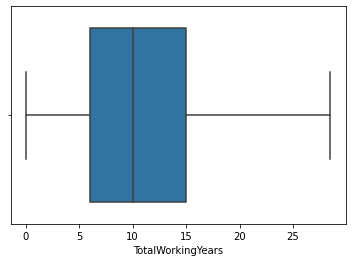

In [121]:
sns.boxplot(df.TotalWorkingYears)

In [122]:
annova = ols('TotalWorkingYears ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df       sum_sq     mean_sq         F  PR(>F)
Attrition     1.0   2556.78507  2556.78507  49.51117     0.0
Residual   1468.0  75808.35115    51.64057       NaN     NaN


## Training Times LastYear

In [123]:
df.TrainingTimesLastYear.value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

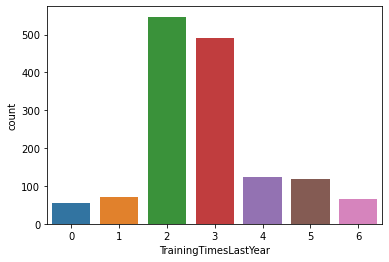

In [124]:
sns.countplot(df.TrainingTimesLastYear)

In [125]:
annova = ols('TrainingTimesLastYear ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df      sum_sq  mean_sq        F   PR(>F)
Attrition     1.0     8.63813  8.63813  5.21165  0.02258
Residual   1468.0  2433.16119  1.65747      NaN      NaN


## Work Life Balance

In [126]:
df.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

1 'Bad',
2 'Good',
3 'Better',
4 'Best'.

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

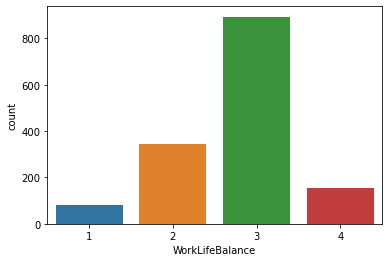

In [127]:
sns.countplot(df.WorkLifeBalance)

In [128]:
annova = ols('WorkLifeBalance ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df     sum_sq  mean_sq        F   PR(>F)
Attrition     1.0    2.99743  2.99743  6.02612  0.01421
Residual   1468.0  730.19237  0.49741      NaN      NaN


## Years At Company

In [129]:
df.YearsAtCompany.value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

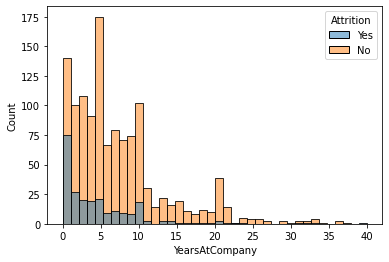

In [130]:
sns.histplot(x = df.YearsAtCompany , hue = df.Attrition)

    • Freshers have higher data of "Attrition Yes" that is of 75 no. of workers or more than half of freshers.

    • Apart from this Employees who ranges from 1 to 10 year working on this company are also likely to quit thier job.

<AxesSubplot:xlabel='YearsAtCompany'>

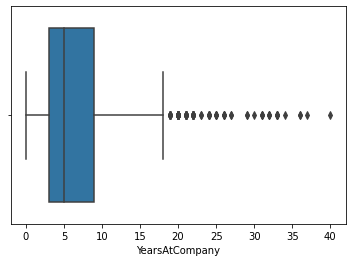

In [131]:
sns.boxplot(df.YearsAtCompany)

In [132]:
q1 = df.YearsAtCompany.quantile(0.25)
q3 = df.YearsAtCompany.quantile(0.75)
iqr = q3 - q1
u_b_YearsAtCompany = q3 + (1.5*iqr)
l_b_YearsAtCompany = q1 - (1.5*iqr)

In [133]:
df.YearsAtCompany = np.where(df.YearsAtCompany>u_b_YearsAtCompany,u_b_YearsAtCompany, np.where(df.YearsAtCompany <l_b_YearsAtCompany, l_b_YearsAtCompany, df.YearsAtCompany))

<AxesSubplot:xlabel='YearsAtCompany'>

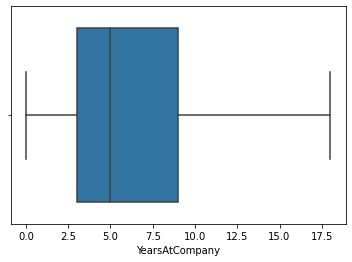

In [134]:
sns.boxplot(df.YearsAtCompany)

In [135]:
annova = ols('YearsAtCompany ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df       sum_sq    mean_sq        F  PR(>F)
Attrition     1.0    962.38148  962.38148  39.6705     0.0
Residual   1468.0  35612.75865   24.25937      NaN     NaN


## Years In CurrentRole

In [136]:
df.YearsInCurrentRole.value_counts()

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

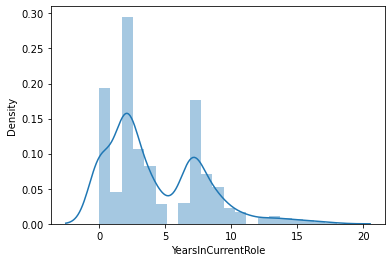

In [137]:
sns.distplot(df.YearsInCurrentRole)

<AxesSubplot:xlabel='YearsInCurrentRole'>

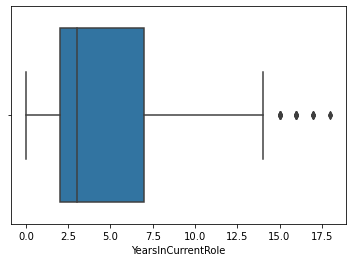

In [138]:
sns.boxplot(df.YearsInCurrentRole)

In [139]:
q1 = df.YearsInCurrentRole.quantile(0.25)
q3 = df.YearsInCurrentRole.quantile(0.75)
iqr = q3 - q1
u_b_YearsInCurrentRole = q3 + (1.5*iqr)
l_b_YearsInCurrentRole = q1 - (1.5*iqr)

In [140]:
df.YearsInCurrentRole = np.where(df.YearsInCurrentRole>u_b_YearsInCurrentRole,u_b_YearsInCurrentRole, np.where(df.YearsInCurrentRole <l_b_YearsInCurrentRole, l_b_YearsInCurrentRole, df.YearsInCurrentRole))

<AxesSubplot:xlabel='YearsInCurrentRole'>

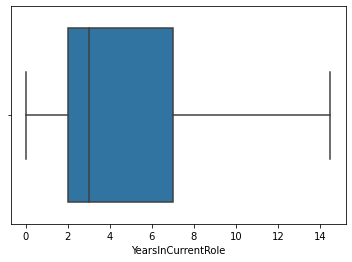

In [141]:
sns.boxplot(df.YearsInCurrentRole)

In [142]:
annova = ols('YearsInCurrentRole ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df       sum_sq    mean_sq         F  PR(>F)
Attrition     1.0    484.21799  484.21799  39.30606     0.0
Residual   1468.0  18084.54205   12.31917       NaN     NaN


## Years Since Last Promotion

In [143]:
df.YearsSinceLastPromotion.value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

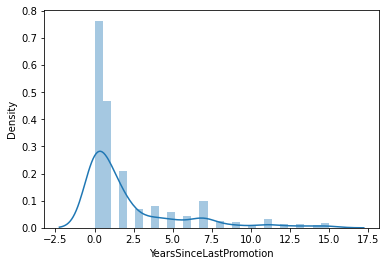

In [144]:
sns.distplot(df.YearsSinceLastPromotion)

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

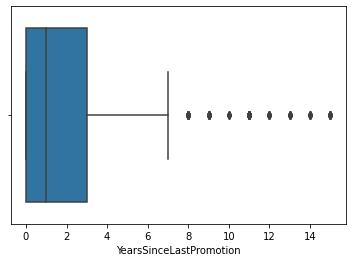

In [145]:
sns.boxplot(df.YearsSinceLastPromotion)

In [146]:
q1 =  df.YearsSinceLastPromotion.quantile(0.25)
q3 = df.YearsSinceLastPromotion.quantile(0.75)
iqr = q3 - q1
u_b_YearsSinceLastPromotion = q3 + (1.5*iqr)
l_b_YearsSinceLastPromotion = q1 - (1.5*iqr)

In [147]:
df.YearsSinceLastPromotion = np.where(df.YearsSinceLastPromotion>u_b_YearsSinceLastPromotion,u_b_YearsSinceLastPromotion, np.where(df.YearsSinceLastPromotion <l_b_YearsSinceLastPromotion, l_b_YearsSinceLastPromotion, df.YearsSinceLastPromotion))

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

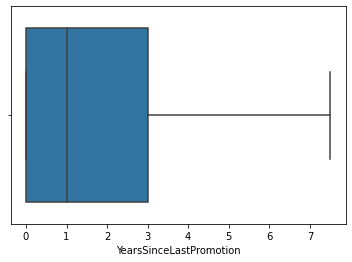

In [148]:
sns.boxplot(df.YearsSinceLastPromotion)

In [149]:
annova = ols('YearsSinceLastPromotion ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df      sum_sq   mean_sq        F   PR(>F)
Attrition     1.0    12.67742  12.67742  2.06569  0.15086
Residual   1468.0  9009.30914   6.13713      NaN      NaN


In [150]:
df.drop(['YearsSinceLastPromotion'] , axis = 1 , inplace = True)

## Years With CurrManager

In [151]:
df.YearsWithCurrManager.value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

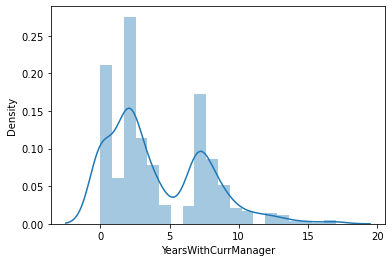

In [152]:
sns.distplot(df.YearsWithCurrManager)

<AxesSubplot:xlabel='YearsWithCurrManager'>

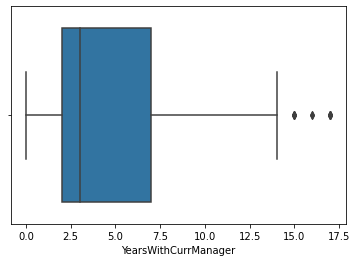

In [153]:
sns.boxplot(df.YearsWithCurrManager)

In [154]:
q1 = df.YearsWithCurrManager.quantile(0.25)
q3 = df.YearsWithCurrManager.quantile(0.75)
iqr = q3 - q1
u_b_YearsWithCurrManager = q3 + (1.5*iqr)
l_b_YearsWithCurrManager = q1 - (1.5*iqr)

In [155]:
df.YearsWithCurrManager = np.where(df.YearsWithCurrManager>u_b_YearsWithCurrManager,u_b_YearsWithCurrManager, np.where(df.YearsWithCurrManager <l_b_YearsWithCurrManager, l_b_YearsWithCurrManager, df.YearsWithCurrManager))

<AxesSubplot:xlabel='YearsWithCurrManager'>

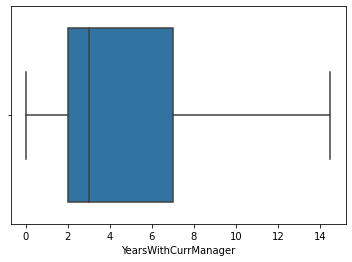

In [156]:
sns.boxplot(df.YearsWithCurrManager)

In [157]:
annova = ols('YearsWithCurrManager ~ Attrition' , data = df).fit()
an = sm.stats.anova_lm(annova)
print(an.round(decimals = 5))

               df       sum_sq    mean_sq        F  PR(>F)
Attrition     1.0    445.14591  445.14591  36.8562     0.0
Residual   1468.0  17730.37178   12.07791      NaN     NaN


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   int64  
 3   DailyRate                1470 non-null   int64  
 4   Department               1470 non-null   int64  
 5   DistanceFromHome         1470 non-null   int64  
 6   EducationField           1470 non-null   float64
 7   EnvironmentSatisfaction  1470 non-null   int64  
 8   JobInvolvement           1470 non-null   int64  
 9   JobLevel                 1470 non-null   int64  
 10  JobRole                  1470 non-null   int32  
 11  JobSatisfaction          1470 non-null   int64  
 12  MaritalStatus            1470 non-null   int64  
 13  MonthlyIncome            1470 non-null   float64
 14  OverTime                

In [159]:
cont  =  df.loc[:,['Age','DailyRate','DistanceFromHome','MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsWithCurrManager','YearsInCurrentRole']]

<AxesSubplot:>

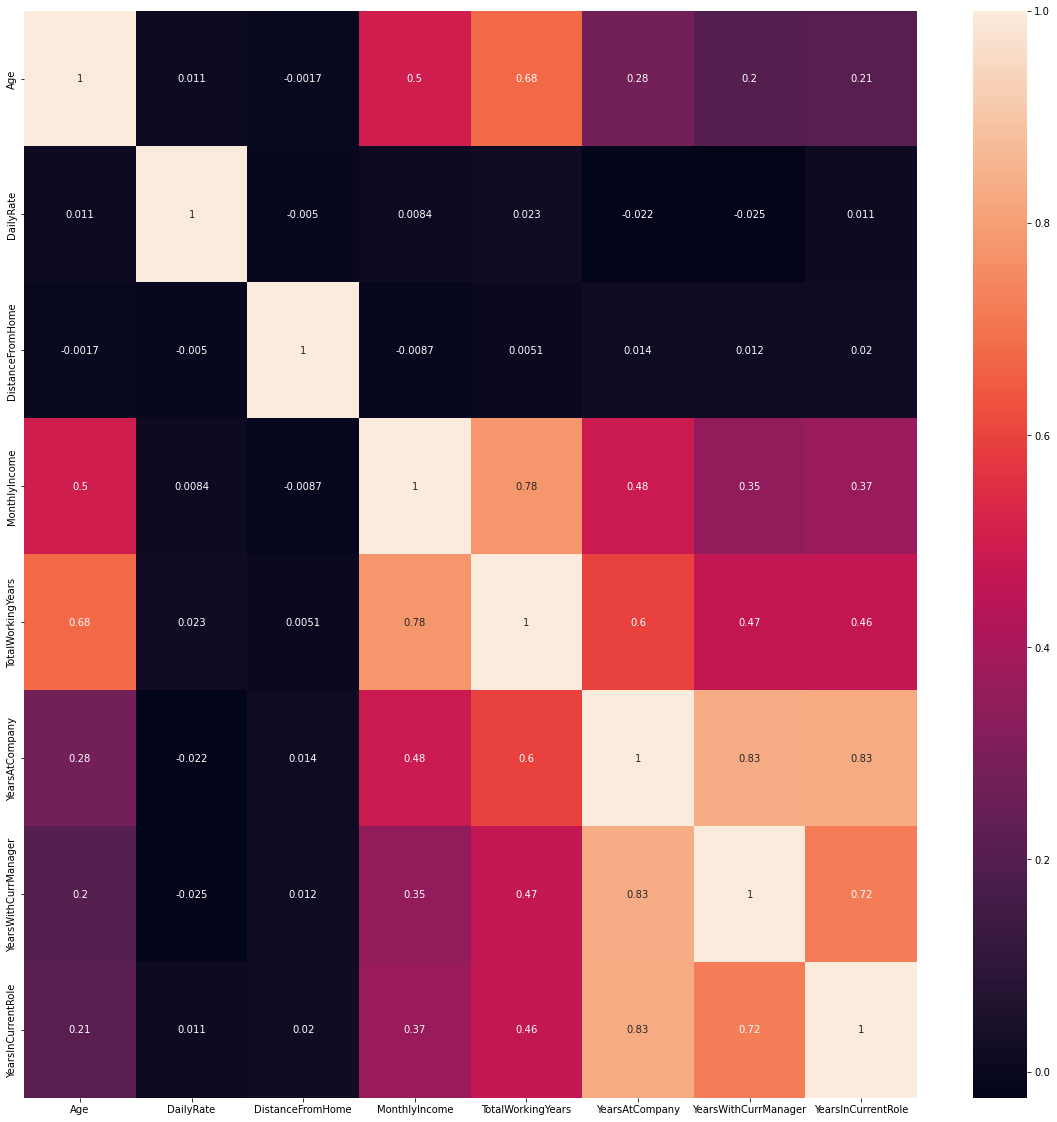

In [160]:
plt.figure(figsize = (20,20))
sns.heatmap(cont.corr() , annot = True)

In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = cont.columns
  
vif_data["VIF"] = [variance_inflation_factor(cont.values,i) for i in range(len(cont.columns))]
  
print(vif_data)

                feature        VIF
0                   Age  10.832337
1             DailyRate   4.236934
2      DistanceFromHome   2.179766
3         MonthlyIncome   7.859733
4     TotalWorkingYears  11.957443
5        YearsAtCompany  16.590266
6  YearsWithCurrManager   7.903196
7    YearsInCurrentRole   7.848655


In [162]:
df = df.drop(['Age' , 'TotalWorkingYears' , 'YearsAtCompany'] , axis = 1)

In [163]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
0,Yes,1,1102,2,1,1.0,2,3,2,7,4,2,5993.0,1,0,0,1,4.0,5.0
1,No,2,279,1,8,1.0,3,2,2,6,2,1,5130.0,2,1,3,3,7.0,7.0
2,Yes,1,1373,1,2,5.0,4,2,1,2,3,2,2090.0,1,0,3,3,0.0,0.0
3,No,2,1392,1,3,1.0,4,3,1,6,3,1,2909.0,1,0,3,3,7.0,0.0
4,No,1,591,1,2,2.0,1,3,1,2,2,1,3468.0,2,1,3,3,2.0,2.0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                1470 non-null   object 
 1   BusinessTravel           1470 non-null   int64  
 2   DailyRate                1470 non-null   int64  
 3   Department               1470 non-null   int64  
 4   DistanceFromHome         1470 non-null   int64  
 5   EducationField           1470 non-null   float64
 6   EnvironmentSatisfaction  1470 non-null   int64  
 7   JobInvolvement           1470 non-null   int64  
 8   JobLevel                 1470 non-null   int64  
 9   JobRole                  1470 non-null   int32  
 10  JobSatisfaction          1470 non-null   int64  
 11  MaritalStatus            1470 non-null   int64  
 12  MonthlyIncome            1470 non-null   float64
 13  OverTime                 1470 non-null   int64  
 14  StockOptionLevel        

# handling unbalanced data

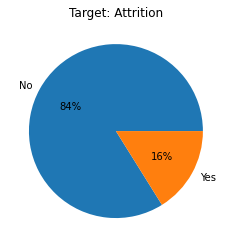

In [165]:
target_var = pd.crosstab(index = df['Attrition'] , columns = '% observations')
plt.pie(target_var['% observations'] , labels = target_var['% observations'].index , autopct = '%.0f%%')
plt.title('Target: Attrition')
plt.show()

In [166]:
df.Attrition = df.Attrition.map({'No':0 , 'Yes':1})

In [167]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [168]:
df.to_csv('HR.csv')

## without smote

In [169]:
x = df.drop(['Attrition'],axis = 1)
y = df.Attrition

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 8)

In [172]:
x.columns

Index(['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'OverTime', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')

In [173]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='liblinear' , random_state = 8) 

In [174]:
model = log.fit(x_train , y_train)

In [175]:
model.intercept_

array([0.73247476])

In [176]:
model.coef_

array([[ 1.03445573e+00,  3.83770245e-05,  5.62476150e-01,
         4.74954285e-02,  1.02796701e-01, -2.67613356e-01,
        -2.90890929e-01,  1.52356813e-02,  7.98645642e-02,
        -2.16180145e-01,  2.30978868e-01, -1.30751849e-04,
        -1.22433515e+00, -4.83839993e-01, -1.20554613e-01,
        -3.11699591e-02, -1.38212486e-01,  1.44392704e-02]])

In [177]:
y_pred = model.predict(x_test)

In [178]:
from sklearn import metrics

In [179]:
cm = metrics.confusion_matrix(y_test , y_pred)
cm

array([[244,   7],
       [ 36,   7]], dtype=int64)

In [180]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [181]:
accuracy_score(y_test , y_pred)

0.8537414965986394

In [182]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       251
           1       0.50      0.16      0.25        43

    accuracy                           0.85       294
   macro avg       0.69      0.57      0.58       294
weighted avg       0.82      0.85      0.82       294



In [183]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [184]:
y_p_p = model.predict_proba(x_test)
fpr , tpr , threshold = roc_curve(y_test , y_p_p[:,1])    
roc_auc = auc(fpr , tpr)
print(roc_auc)

0.7551190586491245


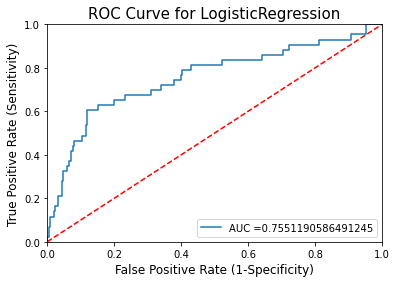

In [185]:
plt.title('ROC Curve for LogisticRegression',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size = 12)
plt.plot([0 , 1] , [0 , 1] ,'r--')
plt.xlim([0 , 1])
plt.ylim([0 , 1])
plt.plot(fpr , tpr , label = 'AUC =' +str(roc_auc))
plt.legend(loc = 4) #Location of label
plt.show()

## with smote

In [186]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Our target variable class is imbalanced, so we will use SMOTE to over sample the minority class for balancing

In [187]:
no = df[df.Attrition == 0]
yes = df[df.Attrition == 1]

In [188]:
from sklearn.utils import resample
os = resample(yes , replace = True , n_samples = len(no) , random_state = 8)

In [189]:
df= pd.concat([no , os])

In [190]:
df.Attrition.value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

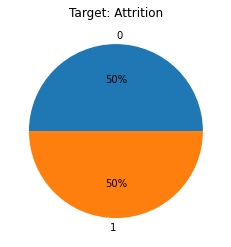

In [191]:
target_var = pd.crosstab(index = df['Attrition'],columns = '% observations')
plt.pie(target_var['% observations'] , labels = target_var['% observations'].index , autopct = '%.0f%%')
plt.title('Target: Attrition')
plt.show()

In [192]:
x2 = df.drop(['Attrition'],axis = 1)
y2 = df.Attrition

In [193]:
x_train , x_test , y_train , y_test = train_test_split(x2 , y2 , test_size = 0.2 , random_state = 8)

In [194]:
from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression(solver = 'liblinear' , random_state = 8) 

In [195]:
model = log1.fit(x_train , y_train)

In [196]:
model.intercept_

array([4.25638881])

In [197]:
model.coef_

array([[ 8.71680121e-01, -2.25328752e-04,  4.18535589e-01,
         3.46733716e-02,  1.60736778e-01, -3.14881719e-01,
        -3.64343110e-01,  5.76438389e-03,  3.36679836e-02,
        -2.62181785e-01,  4.21488882e-02, -1.02430203e-04,
        -1.33607948e+00, -3.98754599e-01, -1.44007770e-01,
        -1.46201291e-01, -1.94096403e-02, -7.12676701e-02]])

In [198]:
y_pred1 = model.predict(x_test)

In [199]:
print(confusion_matrix(y_test,y_pred1))

[[168  83]
 [ 60 183]]


In [200]:
accuracy_score(y_test , y_pred1)

0.7105263157894737

In [201]:
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       251
           1       0.69      0.75      0.72       243

    accuracy                           0.71       494
   macro avg       0.71      0.71      0.71       494
weighted avg       0.71      0.71      0.71       494



In [202]:
y_p_p = model.predict_proba(x_test)
fpr , tpr , threshold = roc_curve(y_test , y_p_p[:,1])    
roc_auc = auc(fpr , tpr)
print(roc_auc)

0.8109619136622235


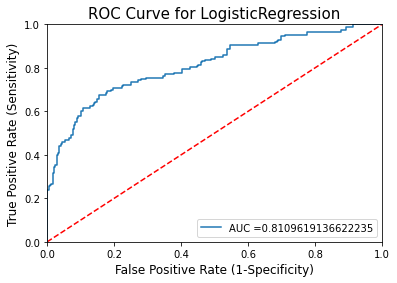

In [203]:
plt.title('ROC Curve for LogisticRegression',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size = 12)
plt.plot([0 , 1], [0, 1],'r--')
plt.xlim([0 , 1])
plt.ylim([0 , 1])
plt.plot(fpr , tpr , label = 'AUC =' +str(roc_auc))
plt.legend(loc = 4) #Location of label
plt.show()

## GLM

In [204]:
import statsmodels.formula.api as smf

In [205]:
col = df.columns

In [206]:
for i in col:
    print(i,'+',end = " ")

Attrition + BusinessTravel + DailyRate + Department + DistanceFromHome + EducationField + EnvironmentSatisfaction + JobInvolvement + JobLevel + JobRole + JobSatisfaction + MaritalStatus + MonthlyIncome + OverTime + StockOptionLevel + TrainingTimesLastYear + WorkLifeBalance + YearsInCurrentRole + YearsWithCurrManager + 

In [207]:
gml = smf.glm(formula = 'Attrition ~ BusinessTravel + DailyRate + Department + DistanceFromHome + EducationField + EnvironmentSatisfaction + JobInvolvement + JobLevel + JobRole + JobSatisfaction + MaritalStatus + MonthlyIncome + OverTime + StockOptionLevel + TrainingTimesLastYear + WorkLifeBalance + YearsInCurrentRole + YearsWithCurrManager',data=df,family=sm.families.Binomial())
result = gml.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Attrition   No. Observations:                 2466
Model:                            GLM   Df Residuals:                     2447
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1289.2
Date:                Sat, 01 Apr 2023   Deviance:                       2578.5
Time:                        14:44:29   Pearson chi2:                 2.47e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2887
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [208]:
df.drop(['JobLevel','JobRole','MaritalStatus','YearsInCurrentRole'],axis = 1,inplace = True)

In [209]:
pred_glm = result.predict()
pred_nominal = [0 if x < 0.5 else 1 for x in pred_glm]
pred_nominal

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,


In [210]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , roc_curve , auc , roc_auc_score

In [211]:
print(confusion_matrix(df['Attrition'] , pred_nominal))

[[920 313]
 [320 913]]


In [212]:
fpr , tpr , threshold = roc_curve(df['Attrition'] , pred_glm)
roc_auc = auc(fpr , tpr)
roc_auc

0.8187634061681693

In [213]:
print(classification_report(df['Attrition'] , pred_nominal , digits = 3))

              precision    recall  f1-score   support

           0      0.742     0.746     0.744      1233
           1      0.745     0.740     0.743      1233

    accuracy                          0.743      2466
   macro avg      0.743     0.743     0.743      2466
weighted avg      0.743     0.743     0.743      2466



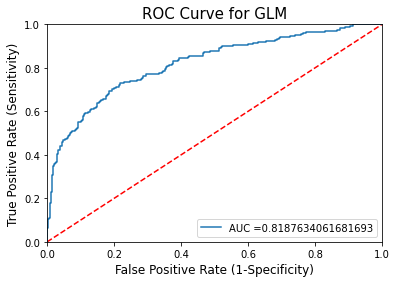

In [214]:
plt.title('ROC Curve for GLM',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size = 12)
plt.plot([0 , 1], [0 , 1],'r--')
plt.xlim([0 , 1])
plt.ylim([0 , 1])
plt.plot(fpr , tpr , label = 'AUC =' +str(roc_auc))
plt.legend(loc = 4) #Location of label
plt.show()